## Linear Regression

In [307]:
import numpy as np
from sklearn.linear_model import LinearRegression
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [308]:
# Data Generation
N=100
true_w=2
true_b=1
np.random.seed(42) 
epsilon=0.1*np.random.randn(N,1)
x=np.random.randn(N,1)
y=true_w*x+true_b+epsilon

idx=np.arange(N)
np.random.shuffle(idx)
train_idx=idx[:int(N*0.8)]
valid_idx=idx[int(N*0.8):]

X_train,y_train=x[train_idx],y[train_idx]
X_valid,y_valid=x[valid_idx],y[valid_idx]

In [309]:
# step 0: Random nitiation of parameters
np.random.seed(42)
w=np.random.randn(1)
b=np.random.randn(1)

print(b,w)

# Initialization of Hyperparameters
lr=0.1
n_epochs=100
# step 1: Forward pass
for epoch in tqdm(range(n_epochs)):
    y_hat=w*X_train+b

# step 2: Computing Loss 
    loss=np.mean(np.square(y_train-y_hat))
    
# step 3: Computing Gradient
    b_grad=2*np.mean(y_hat-y_train)
    w_grad=2*np.mean(X_train*(y_hat-y_train))

# step 4: Updating Parameters
    b=b-lr*b_grad
    w=w-lr*w_grad


print(f"b: {b[0]},\tw: {w[0]}")



[-0.1382643] [0.49671415]


  0%|          | 0/100 [00:00<?, ?it/s]

b: 0.9953649757559992,	w: 1.9849522275624543


### Compare coefficients

In [310]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f"b:{model.intercept_[0]}, \tw:{model.coef_[0][0]}")

b:0.9953649899692825, 	w:1.9849523172037076


## PyTorch Tensors

In [311]:
scalar=torch.tensor(3.14159)
vector=torch.tensor([1,2,3])
matrix=torch.ones((2,3))
tensor=torch.randn((2,2,3),dtype=torch.float32) # 2 2x3 tensors

print(f"scalar: {scalar},\nvector: {vector},\nmatrix: {matrix},\ntensor: {tensor}")

scalar: 3.141590118408203,
vector: tensor([1, 2, 3]),
matrix: tensor([[1., 1., 1.],
        [1., 1., 1.]]),
tensor: tensor([[[ 0.2345,  0.2303, -1.1229],
         [-0.1863,  2.2082, -0.6380]],

        [[ 0.4617,  0.2674,  0.5349],
         [ 0.8094,  1.1103, -1.6898]]])


In [312]:
# shape of a tensor
print(tensor.shape, tensor.size())

torch.Size([2, 2, 3]) torch.Size([2, 2, 3])


In [313]:
scalar.size(),scalar.shape # scalars have empty shape beacuse they are dimensionless

(torch.Size([]), torch.Size([]))

* `view()` method returns a shape with desired shape that shares underlying data of original tensor  
* `reshape()` method may or may not create a copy

In [314]:
same_matrix=matrix.view(1,6)
same_matrix[0,1]=5

print(f"{matrix}\n\n{same_matrix}")

tensor([[1., 5., 1.],
        [1., 1., 1.]])

tensor([[1., 5., 1., 1., 1., 1.]])


`new_tensor()`, `clone()` ---> duplicate data in memory 

In [315]:
# copy the tensor to new one
different_matrix=matrix.new_tensor(matrix.view(1,6))
different_matrix[0,1]=7

print(f"{matrix}\n\n{different_matrix}")


tensor([[1., 5., 1.],
        [1., 1., 1.]])

tensor([[1., 7., 1., 1., 1., 1.]])


C:\Users\anush\AppData\Local\Temp\ipykernel_9684\1908394546.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  different_matrix=matrix.new_tensor(matrix.view(1,6))


pytorch prefer **clone()** with **detach()**

In [316]:
another_matrix=matrix.view(1,6).clone().detach()  # detach method remove the tensor from the computational graph
another_matrix[0,1]=8 

print(f"{matrix}\n\n{another_matrix}")

tensor([[1., 5., 1.],
        [1., 1., 1.]])

tensor([[1., 8., 1., 1., 1., 1.]])


Both `as_tensor()` and `from_numpy()` shares underlying data with original numpy array

In [317]:
X_train_tensor=torch.as_tensor(X_train)
X_train.dtype,X_train_tensor.dtype

(dtype('float64'), torch.float64)

In [318]:
X_train_tensor=X_train_tensor.float() # lower precision float occupy less memory and are faster to compute
X_train_tensor.dtype

torch.float32

In [319]:
# experiment with the tensor
dummy_array=np.array([1,2,3])
dummy_tensor=torch.as_tensor(dummy_array)
dummy_array[1]=0

dummy_tensor

tensor([1, 0, 3], dtype=torch.int32)

`torch.tensor()` always make a copy of data

In [320]:
dummy_tensor2=torch.tensor(dummy_array)
dummy_array[1]=9

dummy_tensor2

tensor([1, 0, 3], dtype=torch.int32)

Transform tensor to numpy array

In [321]:
print(f'{dummy_tensor.numpy()}  --->\t{type(dummy_tensor.numpy())}')

[1 9 3]  --->	<class 'numpy.ndarray'>


## CPU/GPU

In [322]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [323]:
# How many GPUs and Which model they are
n_cudas=torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

In [324]:
# turn tensor into cuda tensor
gpu_tensor=torch.as_tensor(X_train).to(device)
gpu_tensor[0]

tensor([-1.2457], dtype=torch.float64)

In [325]:
device='cuda' if torch.cuda.is_available() else 'cpu'

# we need to transform our numpy arrays into tensors and send them to chosen device
X_train_tensor=torch.as_tensor(X_train).float().to(device)
y_train_tensor=torch.tensor(y_train).float().to(device)



`.type()` is more useful since it tells us where the tensor is (device)

In [326]:
print(f"{X_train_tensor.type()}\n\n{X_train_tensor.dtype}\n\n{type(X_train_tensor)}")

torch.FloatTensor

torch.float32

<class 'torch.Tensor'>


In [327]:
# Turn a cuda tensor back to numpy array
back_to_numpy=X_train_tensor.numpy() # this will throw an error if the tensor is on GPU

back_to_numpy=X_train_tensor.cpu().numpy() # this will work

A tensor for a learnable parameter requires a gradient ---> require_grads=**True**

In [328]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device) # This is the best way to send a tensor to GPU
w = torch.randn(1, requires_grad=True, dtype=torch.float32, device=device)
print(b, w)


tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [329]:
# naive approach
# Assume that I am using a GPU
# I need to send the tensor to GPU
torch.manual_seed(42)
b=torch.randn(1,requires_grad=True,dtype=torch.float32).to(device) 
w=torch.randn(1,requires_grad=True,dtype=torch.float32).to(device)
print(b,w) # we lost gradients

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


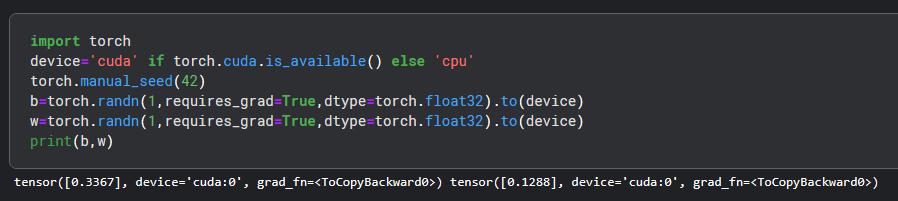  
to(device='cuda:0') shadows the gradient

In [330]:
# Now we send tensor to GPU and set requires_grad=True
torch.manual_seed(42)
b=torch.randn(1,dtype=torch.float32).to(device) 
w=torch.randn(1,dtype=torch.float32).to(device)

# Then set tensors as requires_grad
# In pytorch emthods that ends with _ are in place methods
b.requires_grad_() 
w.requires_grad_() 
print(b)
print(w)

tensor([0.3367], requires_grad=True)
tensor([0.1288], requires_grad=True)


**CUDA tensor**  
tensor([0.3367], device='cuda:0', requires_grad=True)  
tensor([0.1288], device='cuda:0', requires_grad=True)

## AutoGrad

Autograd is pytorh's automatic differentialtion package. We dont need to worry about partial derivatives or chain rule or anything like that

`backward()`---> computing the gradients for all gradient requring tensors

Note: We get diffrenet sequence of random numbers even the seed is same if pytorch generates them in diffrenet devices(CPU/GPU)

In [331]:
# forward pass
y_hat=b+w*X_train_tensor

# compute the loss
loss=torch.mean(torch.square(y_hat-y_train_tensor))

# compute gradients for b & w
# No more manula calculation of gradients
b_grad=2*torch.mean(y_hat-y_train_tensor)
w_grad=2*torch.mean(X_train_tensor*(y_hat-y_train_tensor))

loss.backward() # compute gradients using backpropagation

Dynamic Computation Graph: Tacking dependencies ex: backward() will handle y_hat, error tensors in addition to w,b.  

* We set requires_grad=True for both w,b. 
* w,b is used to calculate y_hat. 
* y_hat is used to compute the error

In [332]:
print(f'y_hat.requires_grad:{y_hat.requires_grad} \nb.requires_grad: {b.requires_grad} \nw.requires_grad: {w.requires_grad}\nX_train_tensor.requires_grad: {X_train_tensor.requires_grad} \ny_train_tensor.requires_grad: {y_train_tensor.requires_grad} \nloss.requires_grad: {loss.requires_grad}')

y_hat.requires_grad:True 
b.requires_grad: True 
w.requires_grad: True
X_train_tensor.requires_grad: False 
y_train_tensor.requires_grad: False 
loss.requires_grad: True


In [333]:
# actual values of the gradients
# gradeints are accumulated
# we need gradients corresponding to curent loss
print(f'b_grad: {b.grad}\nw_grad: {w.grad}')

b_grad: tensor([-1.1832])
w_grad: tensor([-2.8303])


Every time we use gradients to update parameters, we zero them afterward. 

In [334]:
b.grad.zero_() # set gradients to zero
w.grad.zero_()

print(f"b_grad: {b.grad}\nw_grad: {w.grad}")

b_grad: tensor([0.])
w_grad: tensor([0.])


## Update parameters

In [337]:
lr=0.001
epochs=10000

torch.manual_seed(42)
w=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)
b=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)

for epoch in tqdm(range(epochs)):
    y_hat=w*X_train_tensor+b
    error=y_hat-y_train_tensor
    loss=torch.mean(torch.square(error))
    loss.backward()

    with torch.no_grad(): # torch.no_grad is used to operform regular python operations without affecting computation graph
        w-=lr*w.grad # inplace python assignment
        b-=lr*b.grad

    w.grad.zero_() # prevents gradient accumulation
    b.grad.zero_()


print(f"b: {b}\nw: {w}")

  0%|          | 0/10000 [00:00<?, ?it/s]

b: tensor([0.9953], requires_grad=True)
w: tensor([1.9849], requires_grad=True)


## Dynamic Computation Graph

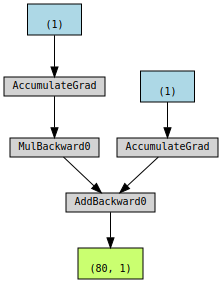

In [341]:
# step 0: Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
b=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)
w=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)

# step 1: forward pass
y_hat=w*X_train_tensor+b

# step 2: compute the loss
error=y_hat-y_train_tensor
loss=torch.mean(torch.square(error))

# plot graph for any variable
make_dot(y_hat)

* blue boxs: tensors that we are asking pytorch to compute gradients  
* gray boxes: python operations that involve gradient computing tensors and their dependencies  
* green box: starting point for the computation of gradients; backward method is called on this variable 

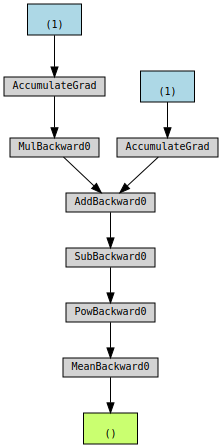

In [342]:
make_dot(loss)

NO gradients, NO graph

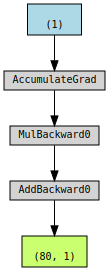

In [344]:
# what if we set require_grad=False for b
# step 0: Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
b=torch.randn(1,requires_grad=False,dtype=torch.float32,device=device)
w=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)

# step 1: forward pass
y_hat=w*X_train_tensor+b

# step 2: compute the loss
error=y_hat-y_train_tensor
loss=torch.mean(torch.square(error))

# plot graph for any variable
make_dot(y_hat)

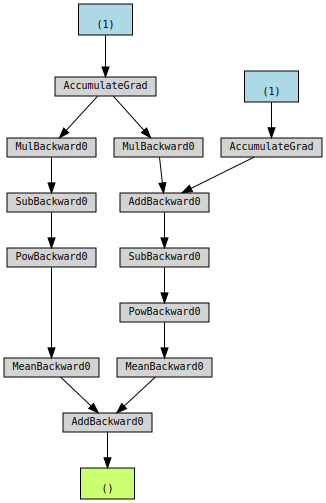

In [348]:
# you can make it as complex as you wan# what if we set require_grad=False for b
# step 0: Initialize parameters "b" and "w" randomly
torch.manual_seed(42)
b=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)
w=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)

# step 1: forward pass
y_hat=w*X_train_tensor+b

# step 2: compute the loss
error=y_hat-y_train_tensor
loss=torch.mean(torch.square(error))

# make no sense
if loss>0:
    y_hat2=w*X_train_tensor
    error2=y_hat2-y_train_tensor

    loss+=torch.mean(torch.square(error2))

# plot graph for any variable
make_dot(loss)


## Optmizer

In [351]:
 # Dont be fooled by optimizer name
# Define optimizer to upadate parameters
optimizer=optim.SGD([b,w],lr=0.001)

In [352]:
# set learning rate
lr=0.001

# initialization of parameters randomly
torch.manual_seed(42)
b=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)
w=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)

# define number of epochs
n_epochs=10000

# Define optimizer to update parameters
optimizer=torch.optim.SGD([w,b],lr=lr)

for epoch in tqdm(range(n_epochs)):
    # forward pass
    y_hat=w*X_train_tensor+b

    # compute the loss
    loss=torch.mean(torch.square(y_hat-y_train_tensor))

    # compute gradients for b and w
    loss.backward()

    # update parameters
    # nO more manual update
    optimizer.step() # this will update parameters
    optimizer.zero_grad() # set gradients to zero

print(f"b: {b}\nw: {w}")

  0%|          | 0/10000 [00:00<?, ?it/s]

b: tensor([0.9953], requires_grad=True)
w: tensor([1.9849], requires_grad=True)


## Loss

In [359]:
# Define MSE loss function
loss_fn=nn.MSELoss(reduction='mean') # how do you aggregate errors of invidual samples
loss_fn

MSELoss()

loss_fn(predictions,labels) ---> loss

In [380]:
# set learning rate
lr=0.1

# initialization of parameters randomly
torch.manual_seed(42)
b=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)
w=torch.randn(1,requires_grad=True,dtype=torch.float32,device=device)

# define number of epochs
n_epochs=56

# Define optimizer to update parameters
optimizer=torch.optim.SGD([w,b],lr=lr)

for epoch in tqdm(range(n_epochs)):
    # forward pass
    y_hat=w*X_train_tensor+b

    # compute the loss
    loss_fn=torch.nn.MSELoss(reduction='mean')
    loss=loss_fn(y_hat,y_train_tensor)

    # compute gradients for b and w
    loss.backward()

    # update parameters
    # nO more manual update
    optimizer.step() # this will update parameters
    optimizer.zero_grad() # set gradients to zero

print(f"b: {b}\nw: {w}")

  0%|          | 0/56 [00:00<?, ?it/s]

b: tensor([0.9953], requires_grad=True)
w: tensor([1.9848], requires_grad=True)


In [384]:
print(loss)

tensor(0.0077, grad_fn=<MseLossBackward0>)


In [400]:
# loss.cpu().numpy()

<span style='color:red'>RuntimeError</span>: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [387]:
loss.detach().cpu().numpy() # detach the tensor from computational graph and send it to CPU

array(0.00767691, dtype=float32)

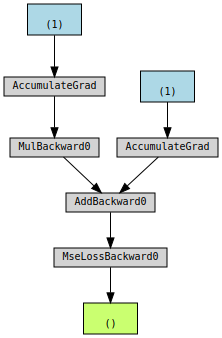

In [389]:
make_dot(loss)

In [399]:
loss.item(), loss.tolist()  # for tensors with one element

(0.007676909677684307, 0.007676909677684307)

## Model